### Keras MLP

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-08-30 08:45:35.477365: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Classification - Sequantial

In [2]:
### fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_train_full.dtype

dtype('uint8')

In [5]:
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
print(x_valid.shape, x_test.shape)

(5000, 28, 28) (10000, 28, 28)


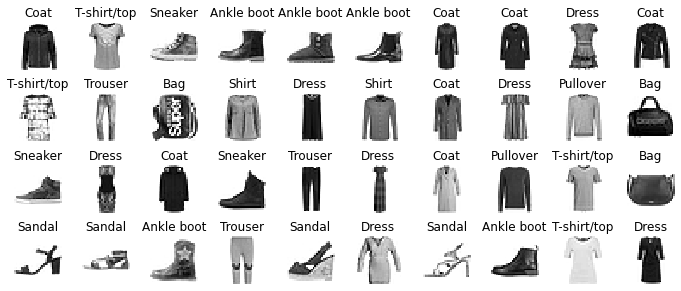

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [9]:
### Keras model 사전 준비
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # multiclass. 이진 분류는 sigmoid
])

2023-08-30 08:45:45.692045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


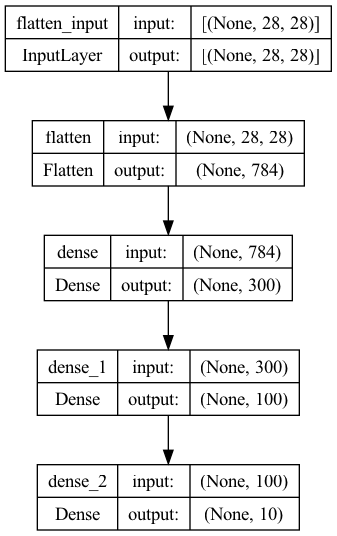

In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
model.get_layer(hidden1.name)

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[-0.05617537,  0.06890687,  0.03056791, ...,  0.00729487,
         0.05469221, -0.00310969],
       [ 0.06313971,  0.0644502 , -0.04801907, ...,  0.01782716,
         0.01746903, -0.03222436],
       [ 0.01926749,  0.03512426, -0.00220738, ..., -0.05967385,
         0.02355869,  0.05588618],
       ...,
       [ 0.00651518,  0.03723922,  0.02139118, ...,  0.0086113 ,
         0.04621488,  0.06047274],
       [ 0.01434779,  0.06317596, -0.03530739, ..., -0.02867665,
         0.0412285 ,  0.04227028],
       [ 0.03386055,  0.05063079, -0.05156458, ...,  0.07095003,
        -0.01757451, -0.03005286]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
### Complie model
model.compile(loss="sparse_categorical_crossentropy", # 배타적인 멀티 클래스. one-hot vector의 경우 categorical_crossentropy 사용
              optimizer="sgd", # 
              metrics=["accuracy"])

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid)) # validataion_split=0.1 등으로도 validation 분할 가능

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7249 - accuracy: 0.7623 - val_loss: 0.5153 - val_accuracy: 0.8268
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4892 - accuracy: 0.8285 - val_loss: 0.4354 - val_accuracy: 0.8534
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4425 - accuracy: 0.8443 - val_loss: 0.5196 - val_accuracy: 0.8056
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4166 - accuracy: 0.8552 - val_loss: 0.3959 - val_accuracy: 0.8662
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3983 - accuracy: 0.8619 - val_loss: 0.3790 - val_accuracy: 0.8698
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3807 - accuracy: 0.8666 - val_loss: 0.3747 - val_accuracy: 0.8700
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3690 - accuracy: 0.8699 - val_loss: 0.3694 - val_accuracy:

In [23]:
print(history.params, history.epoch)

{'verbose': 1, 'epochs': 10, 'steps': 1719} [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

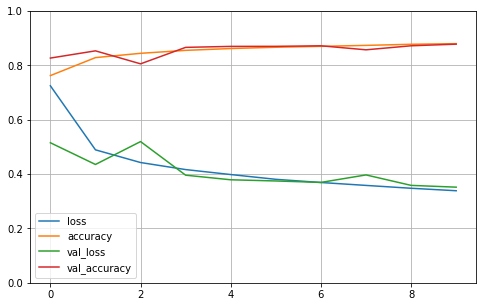

In [25]:
### history plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3899 - accuracy: 0.8593


[0.38988280296325684, 0.8593000173568726]

In [27]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 95ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

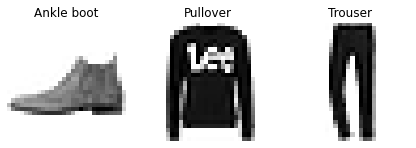

In [31]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Regression - Sequential

In [32]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

### scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [33]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0590 - val_loss: 1.1639
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7844 - val_loss: 0.7521
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7032 - val_loss: 0.8435
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6647 - val_loss: 0.6277
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6294 - val_loss: 0.5942
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5999 - val_loss: 0.7085
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5776 - val_loss: 0.6316
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5574 - val_loss: 0.5741
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5370 - val_loss: 0.5892
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5211 - val_loss: 0.5931

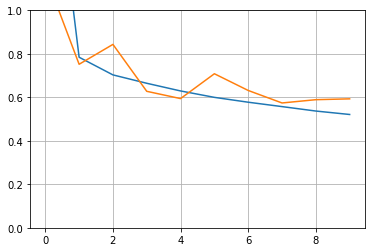

In [35]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 47ms/step


array([[0.57378626],
       [1.4213364 ],
       [2.656775  ]], dtype=float32)

#### Functional API

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

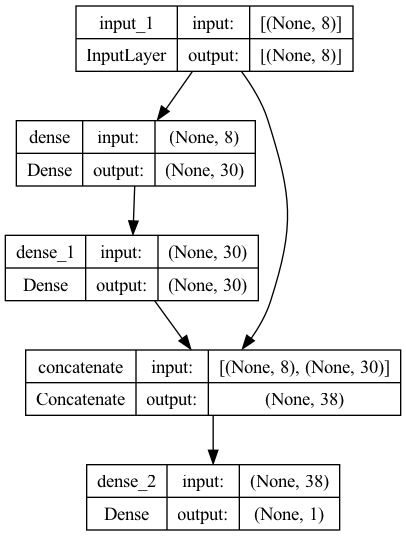

In [40]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [41]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
y_pred = model.predict(x_new)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6056 - val_loss: 0.8150
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7635 - val_loss: 0.6786
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6828 - val_loss: 0.6071
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6232 - val_loss: 0.5637
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5784 - val_loss: 0.5319
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5424 - val_loss: 0.4966
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5159 - val_loss: 0.4723
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4954 - val_loss: 0.4638
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4794 - val_loss: 0.4519
Epoch 10/10
1/1 [==============================] - 0s 57ms/step


In [42]:
### Multi input
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

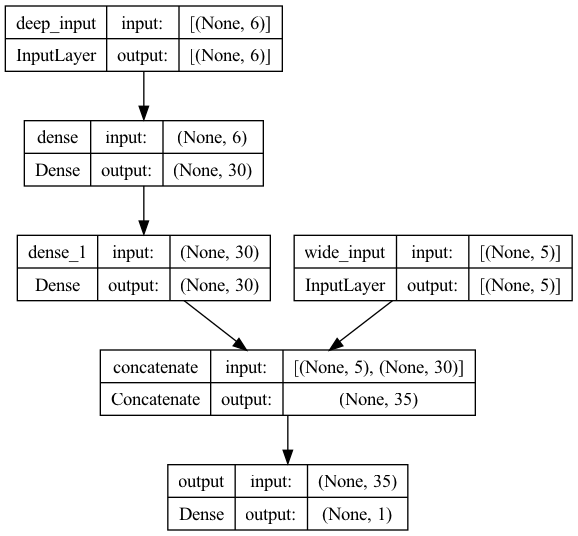

In [45]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

history = model.fit((x_train_A, x_train_B), y_train, epochs=10,
                    validation_data=((x_valid_A, x_valid_B), y_valid))
mse_test = model.evaluate((x_test_A, x_test_B), y_test)
y_pred = model.predict((x_new_A, x_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1847 - val_loss: 4.6079
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7745 - val_loss: 1.5552
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6563 - val_loss: 0.8324
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6073 - val_loss: 0.6291
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5764 - val_loss: 0.5445
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5528 - val_loss: 0.5111
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5339 - val_loss: 0.4899
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5184 - val_loss: 0.4748
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.4629
Epoch 10/10
1/1 [==============================] - 0s 58ms/step


In [47]:
### Multi input and output
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

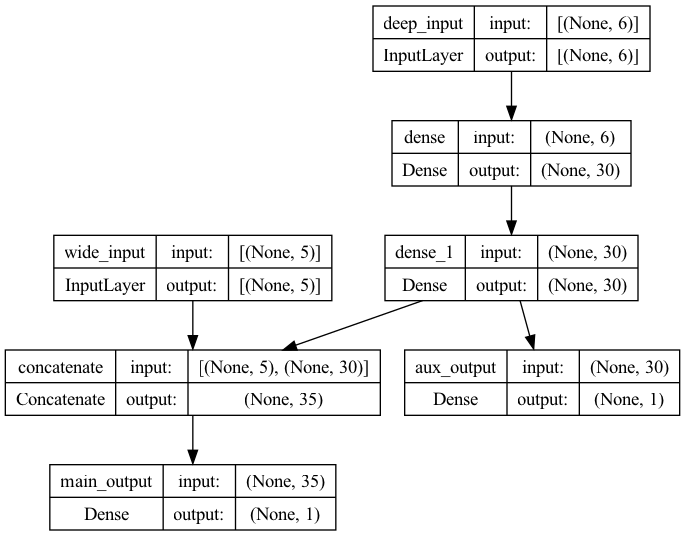

In [49]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [50]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # 출력마다 손실함수 정의

In [51]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=10,
                    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.4371 - main_output_loss: 2.2824 - aux_output_loss: 3.8300 - val_loss: 1.6291 - val_main_output_loss: 0.9220 - val_aux_output_loss: 7.9927
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9270 - main_output_loss: 0.7542 - aux_output_loss: 2.4820 - val_loss: 1.3693 - val_main_output_loss: 0.6922 - val_aux_output_loss: 7.4638
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7470 - main_output_loss: 0.6206 - aux_output_loss: 1.8849 - val_loss: 1.3354 - val_main_output_loss: 0.6523 - val_aux_output_loss: 7.4838
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6649 - main_output_loss: 0.5631 - aux_output_loss: 1.5806 - val_loss: 1.2725 - val_main_output_loss: 0.5839 - val_aux_output_loss: 7.4698
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6166 - main_output_loss: 0.5289 - aux_output_loss: 1.4056 - val_loss

In [52]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A, x_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

1/1 [==============================] - 0s 71ms/step


#### Subclassing API
- 동적 네트워크 구조
- call() 메소드 안에 동작이 정의되므로 모델 복사가 어려움 (pickle 사용)

In [53]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): # 수행할 연산 기입
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [54]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10,
                    validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.2082 - output_1_loss: 2.0847 - output_2_loss: 3.3200 - val_loss: 1.6713 - val_output_1_loss: 1.1324 - val_output_2_loss: 6.5210
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8841 - output_1_loss: 0.7351 - output_2_loss: 2.2249 - val_loss: 1.2022 - val_output_1_loss: 0.7038 - val_output_2_loss: 5.6879
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7529 - output_1_loss: 0.6367 - output_2_loss: 1.7985 - val_loss: 1.0371 - val_output_1_loss: 0.6087 - val_output_2_loss: 4.8927
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6945 - output_1_loss: 0.5951 - output_2_loss: 1.5898 - val_loss: 0.9487 - val_output_1_loss: 0.5761 - val_output_2_loss: 4.3027
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6597 - output_1_loss: 0.5690 - output_2_loss: 1.4752 - val_loss: 0.8669 - val_output_1_loss: 0.5655 - val_ou

#### Model Save & Load
- Subclassing 사용 불가

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.4886 - val_loss: 1.1673
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7684 - val_loss: 0.7342
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6546 - val_loss: 0.8000
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6151 - val_loss: 0.7272
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5863 - val_loss: 0.6291
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5575 - val_loss: 0.6357
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5341 - val_loss: 0.6553
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5128 - val_loss: 0.5378
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4933 - val_loss: 0.5257
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4611


In [56]:
### save
model.save("my_keras_model.h5")

In [57]:
### load
model = keras.models.load_model("my_keras_model.h5")

In [58]:
model.predict(x_new)

1/1 [==============================] - 0s 55ms/step


array([[0.7499318],
       [1.4555223],
       [3.1638172]], dtype=float32)

In [59]:
### weight save & load
model.save_weights("my_keras_weights.ckpt")

In [60]:
model.load_weights("my_keras_weights.ckpt")

#### Callbacks
- Checkpoint 저장
- Early Stopping 적용

In [61]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(x_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7237 - val_loss: 1.4533
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7622 - val_loss: 0.6840
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6854 - val_loss: 0.6519
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6336 - val_loss: 0.6003
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5919 - val_loss: 0.5589
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5560 - val_loss: 0.5210
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5264 - val_loss: 0.4922
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5013 - val_loss: 0.4644
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4807 - val_loss: 0.4436
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4434


In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # Multi checkpoint

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(x_test, y_test)

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4499 - val_loss: 0.4224
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4387 - val_loss: 0.4269
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4297 - val_loss: 0.4197
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.4271
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4164 - val_loss: 0.4152
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4113 - val_loss: 0.4234
Epoch 7/50
162/162 [==============================] - 0s 1ms/step - loss: 0.4033


In [65]:
### Custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [66]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/2
346/363 [===========================>..] - ETA: 0s - loss: 0.4077
val/train: 1.01
363/363 [==============================] - 1s 2ms/step - loss: 0.4113 - val_loss: 0.4149
Epoch 2/2
348/363 [===========================>..] - ETA: 0s - loss: 0.4084
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.4385


#### Hyperparameter Tuning

In [67]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
### build model with hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [69]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) # build_model 함수를 이용하여 모델 생성

/var/folders/cb/__k37xkx4s324t8t_p2bgr4w0000gn/T/ipykernel_52533/2972933473.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) # build_model 함수를 이용하여 모델 생성


In [70]:
keras_reg.fit(x_train, y_train, epochs=50,
              validation_data=(x_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.1868 - val_loss: 7.7752
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7141 - val_loss: 6.9966
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6267 - val_loss: 1.8297
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5204 - val_loss: 0.4854
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4794 - val_loss: 0.4329
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4566 - val_loss: 0.4315
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4422 - val_loss: 0.4023
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4314 - val_loss: 0.3960
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4234 - val_loss: 0.3886
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4169 - val_loss: 0.4024

In [71]:
mse_test = keras_reg.score(x_test, y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.4059


-0.40588879585266113

In [72]:
y_pred = keras_reg.predict(x_new)
y_pred

1/1 [==============================] - 0s 49ms/step


array([0.4688474, 1.7311788, 3.4748719], dtype=float32)

In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
from scipy.stats import reciprocal

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 10).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(100).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(x_train, y_train, epochs=20,
                  validation_data=(x_valid, y_valid), # CV를 진행하므로 valid data는 Early stopping에만 사용
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

In [76]:
rnd_search_cv.best_params_

{'n_neurons': 5, 'n_hidden': 2, 'learning_rate': 0.003331094193916386}

In [77]:
rnd_search_cv.best_score_

-0.4106398622194926

In [78]:
rnd_search_cv.best_estimator_

In [79]:
rnd_search_cv.score(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4117


-0.4116743803024292

In [80]:
model = rnd_search_cv.best_estimator_.model # 최적 모델 저장
model

In [81]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4117


0.4116743803024292

#### Vanishing / Exploding Gradient
- Vanishing: 하위 층으로 갈수록 그레디언트가 점점 작아지는 것
- Exploding: 그레디언트가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신

#####  Initalization
- Xavier(Glorot): 무작위 초기화
- He: ReLU 초기화

In [82]:
### He 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal") # 또는 he_uniform

In [83]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

##### Non-converging Activation Functions
- 그레디언트 소실/폭주를 줄이기 위한 방법
- LeakyReLU: ReLU와 비슷하지만, 음수 부분이 약간의 기울기를 가짐
     - alpha: 새는 정도. 보통 0.01로 설정
- RReLU: alpha를 train 동안 무작위 선택, test 시 평균
- PReLU: alpha가 train 동안 학습
- ELU (Exponential LU): aplha를 지수적으로 결정. 계산이 느린 편
- ScaledELU (SELU): 각 층의 출력을 평균 0, 표준편차 1로 표준화
    - lecun_normal로 initialization
    - 순차적 구조의 모든 은닉층에 사용하면 Self-normalize 가능
    - 성능이 가장 좋았음

In [84]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [85]:
### LeakyReLU
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [86]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [87]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2486 - accuracy: 0.6194 - val_loss: 0.8546 - val_accuracy: 0.7414
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7738 - accuracy: 0.7535 - val_loss: 0.6903 - val_accuracy: 0.7814
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6650 - accuracy: 0.7833 - val_loss: 0.6257 - val_accuracy: 0.7988
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6078 - accuracy: 0.8004 - val_loss: 0.5737 - val_accuracy: 0.8152
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5711 - accuracy: 0.8106 - val_loss: 0.5443 - val_accuracy: 0.8262
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5448 - accuracy: 0.8177 - val_loss: 0.5224 - val_accuracy: 0.8312
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5248 - accuracy: 0.8247 - val_loss: 0.5044 - val_accuracy:

In [88]:
### PReLU
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [89]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [90]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2497 - accuracy: 0.6255 - val_loss: 0.8598 - val_accuracy: 0.7334
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7763 - accuracy: 0.7513 - val_loss: 0.6942 - val_accuracy: 0.7760
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6653 - accuracy: 0.7852 - val_loss: 0.6305 - val_accuracy: 0.7966
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6061 - accuracy: 0.8023 - val_loss: 0.5750 - val_accuracy: 0.8124
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5685 - accuracy: 0.8121 - val_loss: 0.5434 - val_accuracy: 0.8250
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5418 - accuracy: 0.8186 - val_loss: 0.5220 - val_accuracy: 0.8284
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5218 - accuracy: 0.8242 - val_loss: 0.5026 - val_accuracy:

In [91]:
### ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

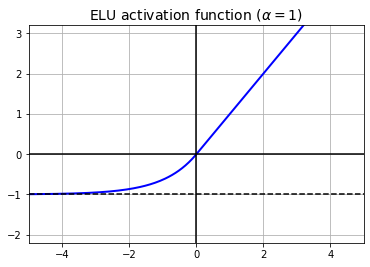

In [94]:
z = np.linspace(-5, 5, 200)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [ ]:
# keras.layers.Dense(10, activation="elu")

In [95]:
from scipy.special import erfc

In [96]:
### SELU
# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [97]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

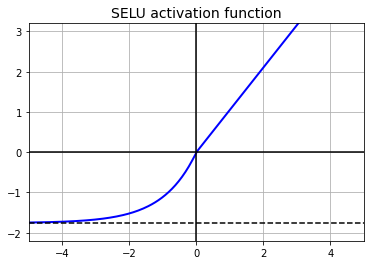

In [98]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [99]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [100]:
# keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [103]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [104]:
### input standardization
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)

x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [105]:
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 30s 13ms/step - loss: 1.4854 - accuracy: 0.4147 - val_loss: 1.0083 - val_accuracy: 0.6310
Epoch 2/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.9291 - accuracy: 0.6542 - val_loss: 0.7538 - val_accuracy: 0.7272
Epoch 3/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.8359 - accuracy: 0.6957 - val_loss: 0.7427 - val_accuracy: 0.7144
Epoch 4/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.6399 - accuracy: 0.7644 - val_loss: 0.6111 - val_accuracy: 0.7812
Epoch 5/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5704 - accuracy: 0.7926 - val_loss: 0.5424 - val_accuracy: 0.8056


##### Batch Normalization
- Activation function 전에 연산 추가
- 정규화, 스케일 조정 및 이동
- 첫 번째 층에 추가하면 Train data를 scaling(표준화) 할 필요 없음
- 현재의 미니배치에서 평균과 표준편차 평가
- Test 할땐 최종 입력 평균과 표준편차 사용. 이동 평균으로 추정
- 연산이 추가되지만, 수렴 속도를 더 빠르게 할 수 있음

In [106]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_101 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_102 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [108]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [109]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [110]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9012 - accuracy: 0.7022 - val_loss: 0.5755 - val_accuracy: 0.8064
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5919 - accuracy: 0.7976 - val_loss: 0.4914 - val_accuracy: 0.8332
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5297 - accuracy: 0.8164 - val_loss: 0.4495 - val_accuracy: 0.8480
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4889 - accuracy: 0.8318 - val_loss: 0.4262 - val_accuracy: 0.8558
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4612 - accuracy: 0.8391 - val_loss: 0.4081 - val_accuracy: 0.8596
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4425 - accuracy: 0.8457 - val_loss: 0.3943 - val_accuracy: 0.8634
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4256 - accuracy: 0.8508 - val_loss: 0.3845 - val_ac

In [111]:
### Activation function 외 노드에도 붙일 수 있음 (use_bias를 False로 설정)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [112]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [113]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 10ms/step - loss: 1.0177 - accuracy: 0.6833 - val_loss: 0.6717 - val_accuracy: 0.7870
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6756 - accuracy: 0.7818 - val_loss: 0.5574 - val_accuracy: 0.8182
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5966 - accuracy: 0.8023 - val_loss: 0.5032 - val_accuracy: 0.8304
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5465 - accuracy: 0.8162 - val_loss: 0.4688 - val_accuracy: 0.8378
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5125 - accuracy: 0.8241 - val_loss: 0.4456 - val_accuracy: 0.8468
Epoch 6/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4908 - accuracy: 0.8306 - val_loss: 0.4270 - val_accuracy: 0.8508
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4752 - accuracy: 0.8334 - val_loss: 0.4130 - val_a

##### Gradient Clipping
- 역전파 시 일정 임곗값을 넘기지 않도록 잘라내기
- Batch normalization 적용이 어려운 RNN에 주로 사용

In [114]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [115]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

#### Transfer Learning
- 사전에 학습된 층 사용
- 출력층만 주로 변경해서 사용

In [116]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(x_train_A, y_train_A), (x_train_B, y_train_B) = split_dataset(x_train, y_train)
(x_valid_A, y_valid_A), (x_valid_B, y_valid_B) = split_dataset(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_dataset(x_test, y_test)

x_train_B = x_train_B[:200]
y_train_B = y_train_B[:200]

In [117]:
print(x_train_A.shape, x_train_B.shape)

(43986, 28, 28) (200, 28, 28)


In [118]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [119]:
### Original model: 8개 카테고리 분류
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [120]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [121]:
history = model_A.fit(x_train_A, y_train_A, epochs=10, validation_data=(x_valid_A, y_valid_A))

Epoch 1/10
1375/1375 [==============================] - 8s 5ms/step - loss: 0.5865 - accuracy: 0.8128 - val_loss: 0.3989 - val_accuracy: 0.8590
Epoch 2/10
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3569 - accuracy: 0.8781 - val_loss: 0.3283 - val_accuracy: 0.8839
Epoch 3/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3189 - accuracy: 0.8903 - val_loss: 0.3032 - val_accuracy: 0.8949
Epoch 4/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2993 - accuracy: 0.8975 - val_loss: 0.2895 - val_accuracy: 0.9011
Epoch 5/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2861 - accuracy: 0.9018 - val_loss: 0.2791 - val_accuracy: 0.9068
Epoch 6/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2762 - accuracy: 0.9052 - val_loss: 0.2722 - val_accuracy: 0.9093
Epoch 7/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2682 - accuracy: 0.9085 - val_loss: 0.2721 - val_accuracy:

In [122]:
model_A.save("my_model_A.h5")

In [123]:
### New model: 다른 2개 카테고리 분류
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [124]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [125]:
history = model_B.fit(x_train_B, y_train_B, epochs=10, validation_data=(x_valid_B, y_valid_B))

Epoch 1/10
7/7 [==============================] - 1s 48ms/step - loss: 0.6579 - accuracy: 0.6300 - val_loss: 0.4736 - val_accuracy: 0.7992
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4056 - accuracy: 0.8700 - val_loss: 0.3853 - val_accuracy: 0.8661
Epoch 3/10
7/7 [==============================] - 0s 17ms/step - loss: 0.3273 - accuracy: 0.9150 - val_loss: 0.3262 - val_accuracy: 0.8986
Epoch 4/10
7/7 [==============================] - 0s 17ms/step - loss: 0.2740 - accuracy: 0.9300 - val_loss: 0.2831 - val_accuracy: 0.9249
Epoch 5/10
7/7 [==============================] - 0s 18ms/step - loss: 0.2348 - accuracy: 0.9550 - val_loss: 0.2500 - val_accuracy: 0.9391
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2038 - accuracy: 0.9800 - val_loss: 0.2247 - val_accuracy: 0.9503
Epoch 7/10
7/7 [==============================] - 0s 16ms/step - loss: 0.1807 - accuracy: 0.9850 - val_loss: 0.2060 - val_accuracy: 0.9533
Epoch 8/10
7/7 [===========

In [126]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                

In [127]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [128]:
model_A_clone = keras.models.clone_model(model_A) # Model A도 B on A 학습할 때 영향을 받으므로, 하나 clone
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [129]:
# Non-trainable
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=4, validation_data=(x_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 114ms/step - loss: 0.1534 - accuracy: 0.9800 - val_loss: 0.1674 - val_accuracy: 0.9696
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 0.1490 - accuracy: 0.9800 - val_loss: 0.1638 - val_accuracy: 0.9706
Epoch 3/4
7/7 [==============================] - 0s 18ms/step - loss: 0.1455 - accuracy: 0.9800 - val_loss: 0.1602 - val_accuracy: 0.9726
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.1421 - accuracy: 0.9800 - val_loss: 0.1565 - val_accuracy: 0.9746


In [130]:
# Trainable
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=10, validation_data=(x_valid_B, y_valid_B))

Epoch 1/10
7/7 [==============================] - 1s 44ms/step - loss: 0.1288 - accuracy: 0.9800 - val_loss: 0.1284 - val_accuracy: 0.9817
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 0.1064 - accuracy: 0.9800 - val_loss: 0.1148 - val_accuracy: 0.9848
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 0.0946 - accuracy: 0.9850 - val_loss: 0.1051 - val_accuracy: 0.9848
Epoch 4/10
7/7 [==============================] - 0s 23ms/step - loss: 0.0861 - accuracy: 0.9850 - val_loss: 0.0975 - val_accuracy: 0.9868
Epoch 5/10
7/7 [==============================] - 0s 20ms/step - loss: 0.0791 - accuracy: 0.9850 - val_loss: 0.0914 - val_accuracy: 0.9868
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 0.0729 - accuracy: 0.9850 - val_loss: 0.0865 - val_accuracy: 0.9868
Epoch 7/10
7/7 [==============================] - 0s 16ms/step - loss: 0.0682 - accuracy: 0.9900 - val_loss: 0.0823 - val_accuracy: 0.9878
Epoch 8/10
7/7 [===========

In [131]:
### Model 평가
model_B.evaluate(x_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9730


[0.15980708599090576, 0.9729999899864197]

In [132]:
model_B_on_A.evaluate(x_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9920


[0.0670444592833519, 0.9919999837875366]

#### Fast Optimizers

##### Optimizers
- Momentum
    - 현재 그레디언트가 얼마인지 확인하고, 모멘텀 벡터를 이용하여 가중치 갱신
    - 그레디언트를 가속도 개념으로 사용
    - 보통 0.9에서 잘 작동하는 편
- Nesterov Accelerated Gradient: 모멘텀 방향으로 조금 나아가서 그레디언트 계산
- AdaGrad
    - 전역 최적점 방향으로 가장 가파른 차원을 따라감
    - 경사가 가파를수록 학습률 감소
    - Adaptive learning rate
    - 간단한 작업에 효과적이며, 모델이 복잡한 경우 전역 최적점에 도착하기 전에 멈추는 경우가 있음
- RMSProp
    - AdaGrad의 문제점 해결
    - 가장 최근 반복의 그레디언트만 추적
    - 감쇄율 (rho)
- Adam
    - Adaptive Moment Estimation
    - Momentum과 RMSProp을 합친 것
    - Adaptive 방식으로, 학습률 튜닝할 필요 없음
- Nadam
    - Adam에 Nesterov 추가
    - Adam보다 더 빠른 수렴

In [133]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [134]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [135]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [136]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [137]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [138]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [139]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

##### Learning Rate Scheduling
- Power
    - Step 별로 학습률 감소
    - s번 step 뒤에 학습률 절반으로 감소
- Exponential
    - s번 step 뒤에 학습률 1/10로 감소
    - 쉽고 수렴이 빨라 가장 선호되는 방법
- Piecewise Constant
    - 일정 횟수 epoch동안 일정한 학습률, 그 다름 epoch에 작은 학습률
    - 시행착오가 큰 방법
- Performance
    - 매 N step마다 검증 오차 측정
    - 오차가 줄어들지 않으면 학습률 감소
- 1 Cycle
    - Train 절반 동안 선형적으로 초기 학습률을 증가시키고, 나머지 절반 동안 선형적으로 학습률을 다시 줄임
    - 마지막 몇 번 epoch는 최댓값으로 진행

In [140]:
### Power
learning_rate_fn = keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.01, decay_steps=10000, power=1e-4)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate_fn)

In [141]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4880 - accuracy: 0.8294 - val_loss: 0.4033 - val_accuracy: 0.8578
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8659 - val_loss: 0.3711 - val_accuracy: 0.8700
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3429 - accuracy: 0.8779 - val_loss: 0.3844 - val_accuracy: 0.8640
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3200 - accuracy: 0.8847 - val_loss: 0.3503 - val_accuracy: 0.8814
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3026 - accuracy: 0.8912 - val_loss: 0.3423 - val_accuracy: 0.8810
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8977 - val_loss: 0.3386 - val_accuracy: 0.8808
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9086 - val_loss: 0.3315 - val_accuracy:

In [142]:
### Exponential
s = 20 * len(x_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate_fn = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=s, decay_rate=1e-4)
optimizer = keras.optimizers.Nadam(learning_rate=learning_rate_fn)

In [143]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.6612 - accuracy: 0.7960 - val_loss: 0.4777 - val_accuracy: 0.8410
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4493 - accuracy: 0.8501 - val_loss: 0.4475 - val_accuracy: 0.8558
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3689 - accuracy: 0.8704 - val_loss: 0.3709 - val_accuracy: 0.8724
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3049 - accuracy: 0.8901 - val_loss: 0.3608 - val_accuracy: 0.8764
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2605 - accuracy: 0.9043 - val_loss: 0.3152 - val_accuracy: 0.8894
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2239 - accuracy: 0.9188 - val_loss: 0.3177 - val_accuracy: 0.8946
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1961 - accuracy: 0.9267 - val_loss: 0.3245 - val_ac

In [144]:
### Piecewise Constant
n_steps_per_epoch = 10
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])
optimizer = keras.optimizers.Nadam(learning_rate=learning_rate_fn)

In [145]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.4955 - accuracy: 0.8385 - val_loss: 0.3607 - val_accuracy: 0.8740
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3413 - accuracy: 0.8741 - val_loss: 0.3707 - val_accuracy: 0.8644
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3062 - accuracy: 0.8849 - val_loss: 0.3495 - val_accuracy: 0.8732
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2804 - accuracy: 0.8953 - val_loss: 0.3227 - val_accuracy: 0.8864
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2567 - accuracy: 0.9040 - val_loss: 0.3131 - val_accuracy: 0.8890
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2410 - accuracy: 0.9093 - val_loss: 0.3198 - val_accuracy: 0.8902
Epoch 7/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.2265 - accuracy: 0.9152 - val_loss: 0.3336 - val_ac

In [146]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [147]:
### Performance
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5995 - accuracy: 0.8054 - val_loss: 0.4651 - val_accuracy: 0.8510 - lr: 0.0200
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4938 - accuracy: 0.8409 - val_loss: 0.5239 - val_accuracy: 0.8450 - lr: 0.0200
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5168 - accuracy: 0.8411 - val_loss: 0.5326 - val_accuracy: 0.8534 - lr: 0.0200
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5142 - accuracy: 0.8468 - val_loss: 0.4956 - val_accuracy: 0.8512 - lr: 0.0200
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5262 - accuracy: 0.8474 - val_loss: 0.4720 - val_accuracy: 0.8626 - lr: 0.0200
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5253 - accuracy: 0.8501 - val_loss: 0.5234 - val_accuracy: 0.8492 - lr: 0.0200
Epoch 7/10
1719/1719 [==============================] - 9s

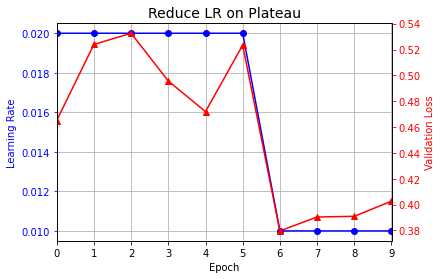

In [148]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [149]:
import math

In [150]:
### 1 Cycle
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [151]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Epoch 1/5
430/430 [==============================] - 4s 9ms/step - loss: 2.5364 - accuracy: 0.2117
Epoch 2/5
430/430 [==============================] - 4s 9ms/step - loss: 1.2157 - accuracy: 0.5853
Epoch 3/5
430/430 [==============================] - 4s 8ms/step - loss: 0.5756 - accuracy: 0.7985
Epoch 4/5
430/430 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.7448
Epoch 5/5
430/430 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.1008


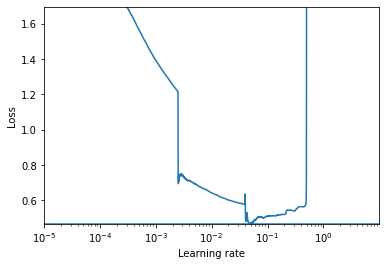

In [152]:
batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=5, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [153]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [154]:
n_epochs = 10
onecycle = OneCycleScheduler(math.ceil(len(x_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/10
430/430 [==============================] - 4s 9ms/step - loss: 0.6453 - accuracy: 0.7763 - val_loss: 0.4667 - val_accuracy: 0.8408
Epoch 2/10
430/430 [==============================] - 4s 9ms/step - loss: 0.4396 - accuracy: 0.8465 - val_loss: 0.4104 - val_accuracy: 0.8582
Epoch 3/10
430/430 [==============================] - 4s 9ms/step - loss: 0.3959 - accuracy: 0.8588 - val_loss: 0.4018 - val_accuracy: 0.8570
Epoch 4/10
430/430 [==============================] - 4s 9ms/step - loss: 0.3685 - accuracy: 0.8682 - val_loss: 0.3720 - val_accuracy: 0.8714
Epoch 5/10
430/430 [==============================] - 4s 8ms/step - loss: 0.3474 - accuracy: 0.8748 - val_loss: 0.3622 - val_accuracy: 0.8708
Epoch 6/10
430/430 [==============================] - 4s 8ms/step - loss: 0.3120 - accuracy: 0.8887 - val_loss: 0.3512 - val_accuracy: 0.8836
Epoch 7/10
430/430 [==============================] - 4s 9ms/step - loss: 0.2890 - accuracy: 0.8961 - val_loss: 0.3410 - val_accuracy: 0.8806
Epoch 

#### Penalty
- Overfitting 방지

##### $\ell_1$ and $\ell_2$

In [155]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 1.6132 - accuracy: 0.8141 - val_loss: 0.7028 - val_accuracy: 0.8398
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7186 - accuracy: 0.8280 - val_loss: 0.6928 - val_accuracy: 0.8336


In [156]:
from functools import partial

In [157]:
RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 21s 11ms/step - loss: 1.6233 - accuracy: 0.8135 - val_loss: 0.7051 - val_accuracy: 0.8410
Epoch 2/2
1719/1719 [==============================] - 19s 11ms/step - loss: 0.7206 - accuracy: 0.8279 - val_loss: 0.6952 - val_accuracy: 0.8344


##### Dropout
- 노드 드롭
- 일반적으로 맨 위부터 세번째 층까지 적용
- AlphaDropout: SELU가 activation function인 경우

In [158]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5717 - accuracy: 0.8035 - val_loss: 0.3605 - val_accuracy: 0.8734
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4226 - accuracy: 0.8458 - val_loss: 0.3474 - val_accuracy: 0.8718


In [159]:
### Alpha dropout
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6616 - accuracy: 0.7603 - val_loss: 0.5963 - val_accuracy: 0.8406
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5553 - accuracy: 0.7963 - val_loss: 0.5562 - val_accuracy: 0.8446
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5268 - accuracy: 0.8052 - val_loss: 0.5041 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5054 - accuracy: 0.8124 - val_loss: 0.4582 - val_accuracy: 0.8656
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4939 - accuracy: 0.8165 - val_loss: 0.4435 - val_accuracy: 0.8596
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4823 - accuracy: 0.8220 - val_loss: 0.4590 - val_accuracy: 0.8598
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4695 - accuracy: 0.8258 - val_loss: 0.4945 - val_ac

In [160]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.8556


[0.4925917088985443, 0.8555999994277954]

In [161]:
model.evaluate(x_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3915 - accuracy: 0.8741


[0.3914501667022705, 0.8741454482078552]

In [162]:
### Monte Carlo(MC) dropout
# 성능 향상, 더 정확한 불확실성 추정
# 위험에 민감한 경우 사용
# 예측 속도 저하 있음
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [163]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [164]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [165]:
mc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)              0

In [166]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [167]:
mc_model.set_weights(model.get_weights())

In [ ]:
np.round(np.mean([mc_model.predict(x_test_scaled[:1]) for sample in range(100)], axis=0), 2)

##### Max-Norm
- 각각의 연결 가중치가 r 미만이 되도록 규제

In [169]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [170]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4739 - accuracy: 0.8327 - val_loss: 0.3614 - val_accuracy: 0.8666
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3574 - accuracy: 0.8696 - val_loss: 0.3815 - val_accuracy: 0.8634
